## This Jupyter Notebook should be used just for the final code

# 1 - Data Preparation

## 1.1. - Loading baywheel 2018 data

In [2]:
# import all the necessary libraries
import pandas as pd;pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

## 1.2. - Exploring the data

In order to prepare our raw data for model creation, we must first understand the data.
There are some built-in methods that can provide us with quick insights into some of the issues we must address as well as provide us with a rudimentary overview of the data:
- The shape method allows us to quickly ascertain the dimensions of the data set;
- The head method provides a concise preview of the dataset's initial records;
- The info method provides us with a summary of the df information such as data types and memory usage;
- The describe method provides us with some descriptive statistics for the dataframe's variables;

In [4]:
# number of rows and columns
baywheels_df.shape

(1863731, 9)

In [5]:
# quick review and insights by checking the first 5 rows of the df
baywheels_df.head()

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0  Date: 26/04/18; Time: 18:04:41  Date: 26/04/18; Time: 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1  Date: 18/05/18; Time: 19:34:12  Date: 18/05/18; Time: 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0
2  Date: 14/07/18; Time: 14:57:05  Date: 14/07/18; Time: 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0
3  Date: 11/11/18; Time: 16:35:22  Date: 11/11/18; Time: 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0
4  Date: 15/12/18; Time: 10:15:24  Date: 15/12/18; Time: 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0

In [6]:
# check the types of data we have in the dataframe
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863731 entries, 0 to 1863730
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 142.2+ MB


In [7]:
# summary statistics of the columns in the df
baywheels_df.describe()

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
count     1863731  1863731          1851960           1863731           1863731        1851960         1863731         1863731  1863731
unique    1738468  1742057              332               370               371            332             371             372     5055
top       Failure  Failure             15.0         37.795392       -122.394203           67.0      37.7766392    -122.3955263   3961.0
freq           10       10            38461             38461             38461          50000           50000           50000     1220

From this quick overview we can already see **some issues** that will need to be addressed:
- Datetypes need to be recoded to the **appropriate format**;
- The most frequent value in start_time and end_time is **"Failure"** which hints at some issues with the corresponding rows;
- There are 1863731 start_time and end_time occurances but only 1738468 unique start_times and 1742057 unique end_times. We need to check whether there are **duplicated rows** based on the times and the bike_id;
- There is a **mismatch** between the number of unique start and end stations latitude and longitude;

We also get some other information:
- there are **332 unique bike stations;**
- there are **5055 unique bike ids;**
- **station id 15** is the **most frequent station** for **starting a trip**, with **38461 trips started** at this location;
- **station id 67** is the **most frequent station** for **ending a trip**, with **50000 trips ended** at this location;
- **bike with id 3961** was the **most used**, with **1220 trips made;**

## 1.3. - Handling missing values

In order to increase the quality of the data in our dataframe, we must first address missing values. We will first attempt to fill out missing data and, when not possible, we will exclude the records from the dataframe. This will lead to:
- **Decrease in**: bias and incorrect imputations
- **Increase in**: data integrity, model performance, data quality and data visualization

In [8]:
# display the number of NaN values in the columns
for column in baywheels_df.columns:
    print(f'column {column} has {baywheels_df[column].isna().sum()} NaN values')

column start_time has 0 NaN values
column end_time has 0 NaN values
column start_station_id has 11771 NaN values
column start_station_lat has 0 NaN values
column start_station_lon has 0 NaN values
column end_station_id has 11771 NaN values
column end_station_lat has 0 NaN values
column end_station_lon has 0 NaN values
column bike_id has 0 NaN values


In [9]:
# check what is happening with the "Failure" rows in the start_time and end_time columns
baywheels_df[baywheels_df['start_time'] == 'Failure']

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure

### 1.3.1. - start_time and end_time 
The 10 rows with missing values in the 'start_time' column are exactly the same rows with missing values in the 'end_time' column. We will exclude these rows from the dataframe.

In [10]:
# drop the Failure rows
baywheels_df = baywheels_df[baywheels_df['start_time'] != 'Failure']

### 1.3.2. - start_station_id and end_station_id
There are 11771 rows with NaN values in both the start_station_id and the end_station_id. Let's check if the rows with NaN values in start_station_id are in the same rows as in end_station_id.

In [11]:
baywheels_df[baywheels_df['start_station_id'].isna() & baywheels_df['end_station_id'].isna()]

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id
401      Date: 17/11/18; Time: 13:41:26  Date: 17/11/18; Time: 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0
532      Date: 18/07/18; Time: 21:16:40  Date: 18/07/18; Time: 21:20:22              NaN             37.41           -121.95            NaN           37.42         -121.95  4205.0
674      Date: 28/09/18; Time: 09:14:06  Date: 28/09/18; Time: 09:23:57              NaN             37.41           -121.96            NaN            37.4         -121.94  4148.0
825      Date: 19/06/18; Time: 19:07:49  Date: 19/06/18; Time: 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0
941      Date: 21/07/18; Time: 09:21:19  Date: 21/07/18; Time: 09:30:13              NaN              37.4           -121.94            NaN            37.4         -121.93  4288.0
...                                 ...                             ...              ...               ...               ...            ...             ...             ...     ...
1863397  Date: 06/08/18; Time: 19:16:48  Date: 06/08/18; Time: 19:22:06              NaN             37.39           -121.93            NaN           37.38         -121.93  4152.0
1863454  Date: 16/07/18; Time: 19:28:52  Date: 16/07/18; Time: 19:58:28              NaN             37.41           -121.94            NaN           37.41         -121.95  4117.0
1863465  Date: 27/07/18; Time: 14:48:18  Date: 27/07/18; Time: 15:19:20              NaN             37.33           -121.91            NaN           37.35          -121.9  4097.0
1863492  Date: 16/08/18; Time: 19:27:19  Date: 16/08/18; Time: 19:42:18              NaN             37.41           -121.96            NaN            37.4         -121.93  4128.0
1863624  Date: 06/08/18; Time: 20:40:50  Date: 06/08/18; Time: 21:08:14              NaN              37.4           -121.94            NaN            37.4         -121.94  4288.0

[11771 rows x 9 columns]

We can deduce the start_station_id and end_station_id by checking the longitude and latitude. First we create a dictionary with the station's ids and the corresponding coordinates. Then we can match the coordinates on the rows with missing values for the ids by using that dictionary.

In [12]:
station_dict = {}

for index, row in baywheels_df.iterrows():
    start_id = row['start_station_id']
    start_lat = row['start_station_lat']
    start_lon = row['start_station_lon']
    end_id = row['end_station_id']
    end_lat = row['end_station_lat']
    end_lon = row['end_station_lon']
    
    if pd.notnull(start_id):
        station_dict[(start_lat, start_lon)] = start_id
    if pd.notnull(end_id):
        station_dict[(end_lat, end_lon)] = end_id

In [13]:
def fill_station_id(row):
    lat_lon_pair = (row['start_station_lat'], row['start_station_lon'])
    if pd.isnull(row['start_station_id']):
        row['start_station_id'] = station_dict.get(lat_lon_pair, None)

    lat_lon_pair = (row['end_station_lat'], row['end_station_lon'])
    if pd.isnull(row['end_station_id']):
        row['end_station_id'] = station_dict.get(lat_lon_pair, None)

    return row

In [14]:
baywheels_df = baywheels_df.apply(fill_station_id, axis=1)

Let's check if there are still missing values on the start_station_id and end_station_id columns

In [15]:
baywheels_df['start_station_id'].isna().sum()

11771

In [16]:
baywheels_df['end_station_id'].isna().sum()

11771

In [17]:
nan_start_and_end_station_id_rows = baywheels_df[baywheels_df['start_station_id'].isna() & baywheels_df['end_station_id'].isna()]
nan_start_and_end_station_id_rows

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id
401      Date: 17/11/18; Time: 13:41:26  Date: 17/11/18; Time: 13:44:57             None             37.41           -121.95           None           37.41         -121.94  4256.0
532      Date: 18/07/18; Time: 21:16:40  Date: 18/07/18; Time: 21:20:22             None             37.41           -121.95           None           37.42         -121.95  4205.0
674      Date: 28/09/18; Time: 09:14:06  Date: 28/09/18; Time: 09:23:57             None             37.41           -121.96           None            37.4         -121.94  4148.0
825      Date: 19/06/18; Time: 19:07:49  Date: 19/06/18; Time: 19:50:04             None              37.4           -121.93           None           37.39         -121.94  4083.0
941      Date: 21/07/18; Time: 09:21:19  Date: 21/07/18; Time: 09:30:13             None              37.4           -121.94           None            37.4         -121.93  4288.0
...                                 ...                             ...              ...               ...               ...            ...             ...             ...     ...
1863397  Date: 06/08/18; Time: 19:16:48  Date: 06/08/18; Time: 19:22:06             None             37.39           -121.93           None           37.38         -121.93  4152.0
1863454  Date: 16/07/18; Time: 19:28:52  Date: 16/07/18; Time: 19:58:28             None             37.41           -121.94           None           37.41         -121.95  4117.0
1863465  Date: 27/07/18; Time: 14:48:18  Date: 27/07/18; Time: 15:19:20             None             37.33           -121.91           None           37.35          -121.9  4097.0
1863492  Date: 16/08/18; Time: 19:27:19  Date: 16/08/18; Time: 19:42:18             None             37.41           -121.96           None            37.4         -121.93  4128.0
1863624  Date: 06/08/18; Time: 20:40:50  Date: 06/08/18; Time: 21:08:14             None              37.4           -121.94           None            37.4         -121.94  4288.0

[11771 rows x 9 columns]

In [18]:
print(f'The ratio of rows that will be excluded from the dataframe is {round(201/11771*100)}%')

The ratio of rows that will be excluded from the dataframe is 2%


There is no correspondence between the latitude and longitude and an existing station record. This is because for the missing station_id rows the coordinates are rounded. For this reason, we will exclude this small percentage of records from the dataframe.

In [19]:
baywheels_df = baywheels_df.drop(nan_start_and_end_station_id_rows.index)

## 1.4. - Recoding object datatypes

Now that our dataframe no longer has missing values, we will convert the column data types to a more appropriate datatype. This will provide us with **memory efficiency** (specific datatypes take up less memory than object datatypes), **computational efficiency** (optimized operations and calculations) and **data integrity** (consistency and validity of the data).

In [20]:
# convert the start_time and end_time object into datetime64 objects, enabling time-based operations
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [21]:
# converting all other columns into numerical datetypes

baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 141.3 MB


## 1.5. - Checking for duplicates

Duplicate entries may lead to misleading statistics, bias and inaccurate representation of the data which in turn will lead to poor model results. For this reason, we must identify and remove duplicate entries.

In [22]:
baywheels_df[baywheels_df.duplicated()]

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id]
Index: []

No duplicates were found.

## 1.6. - Data enrichment

We will be enhancing and improving the quality and usefulness of existing data by adding additional information by generating new features from the existing data.

### 1.6.1. - trip_duration

In [23]:
# add a column 'trip_duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [24]:
baywheels_df.head()['trip_duration']

0   0 days 00:05:26
1   0 days 00:03:45
2   0 days 00:13:32
3   0 days 00:10:15
4   0 days 00:04:59
Name: trip_duration, dtype: timedelta64[ns]

In [25]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 155.4 MB


In [26]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:13.493761710


There are negative trip duration values. This should not be possible. We will need to do a deeper analysis to see what went wrong.

In [27]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id     trip_duration
223042  2018-11-04 01:48:20 2018-11-04 01:02:58                59          37.774814        -122.418954              27        37.788059      -122.391865     2331 -1 days +23:14:38
840962  2018-11-04 01:52:40 2018-11-04 01:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 -1 days +23:09:47
1129000 2018-11-04 01:51:00 2018-11-04 01:06:56               183          37.808702        -122.269927             149        37.831275      -122.285633      417 -1 days +23:15:56
1131781 2018-11-04 01:59:54 2018-11-04 01:07:50                67          37.776639        -122.395526              37        37.785000      -122.395936     1497 -1 days +23:07:56
1238539 2018-11-04 01:58:47 2018-11-04 01:01:38               132          37.751819        -122.426614             134        37.752428      -122.420628     2487 -1 days +23:02:51
1511289 2018-11-04 01:59:01 2018-11-04 01:02:48                41          37.781270        -122.418740              61        37.776513      -122.411306     2136 -1 days +23:03:47

In [28]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [29]:
#we also handle the situation for the time change on 11th of March were the time moved one hour forward
start_range = pd.to_datetime('2018-03-11 02:00:00')
end_range = pd.to_datetime('2018-03-11 02:00:00')
mask = (
    ((baywheels_df['start_time'].dt.date < pd.to_datetime('2018-03-11').date()) & (baywheels_df['end_time'] >= start_range)) |
    ((baywheels_df['start_time'].dt.date == pd.to_datetime('2018-03-11').date()) & (baywheels_df['start_time'] <= start_range) & (baywheels_df['end_time'] >= end_range)))


relevant_rows = baywheels_df[mask]
relevant_rows

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
97558   2018-03-10 12:35:23 2018-03-11 10:34:17                39          37.778999        -122.436861             141        37.747998      -122.420219      273 0 days 21:58:54
299340  2018-03-10 15:56:52 2018-03-11 13:50:21               114          37.764478        -122.402570             114        37.764478      -122.402570     2076 0 days 21:53:29
393290  2018-03-11 01:50:20 2018-03-11 03:20:13                49          37.780760        -122.394989             133        37.755213      -122.420975     3247 0 days 01:29:53
585208  2018-03-11 01:10:13 2018-03-11 03:10:33               133          37.755213        -122.420975             122        37.760299      -122.418892      324 0 days 02:00:20
697617  2018-03-10 17:58:27 2018-03-11 14:19:11                23          37.791464        -122.391034              97        37.768265      -122.420110      610 0 days 20:20:44
1096396 2018-03-10 12:34:57 2018-03-11 10:34:39                39          37.778999        -122.436861             141        37.747998      -122.420219     2766 0 days 21:59:42
1326635 2018-03-11 00:19:40 2018-03-11 13:44:10               245          37.870348        -122.267764             240        37.866043      -122.258804     2092 0 days 13:24:30
1571430 2018-03-10 12:34:13 2018-03-11 10:34:17                39          37.778999        -122.436861             141        37.747998      -122.420219     3398 0 days 22:00:04

In [30]:
#subtract one hour from the end_time value
#only run in the final notebook
"""
for row_index in relevant_rows.index:
    baywheels_df.loc[row_index, 'end_time'] -= pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])
"""

"\nfor row_index in relevant_rows.index:\n    baywheels_df.loc[row_index, 'end_time'] -= pd.Timedelta(hours=1)\n    print(baywheels_df.loc[row_index, 'end_time'])\n"

In [31]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [32]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('0 days 00:01:01')

### 1.6.2. - Weather data

In [33]:
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head()

city            timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  San Francisco  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  San Francisco  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0
2  San Francisco  2015-01-01 10:56:00         10.0         33.0                    Fair   1018.60       28.0            0.0              10.0
3  San Francisco  2015-01-01 11:56:00          9.0         33.0                    Fair   1018.60       19.0            0.0               7.0
4  San Francisco  2015-01-01 12:56:00          9.0         33.0                    Fair   1018.60       20.0            0.0               6.0

In [34]:
# check what values are in city columns
weather_df_full['city'].unique()

array(['San Francisco'], dtype=object)

In [35]:
# we can drop the city column
weather_df_full.drop(labels='city', axis=1, inplace=True)

In [36]:
# filter just values from 2018 year
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df.head()

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0

In [37]:
for column in weather_df.columns:
    print(f'column {column} has {weather_df[column].isna().sum()} NaN values')

column timestamp has 0 NaN values
column temperature has 0 NaN values
column cloud_cover has 0 NaN values
column cloud_cover_description has 0 NaN values
column pressure has 0 NaN values
column windspeed has 1 NaN values
column precipitation has 0 NaN values
column felt_temperature has 0 NaN values


In [38]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
29726 2018-02-04 10:56:00         14.0         33.0                    Fair    1018.6        NaN            0.0              14.0


In [39]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

temperature  cloud_cover     pressure    windspeed  precipitation  felt_temperature
count  9523.000000  9523.000000  9523.000000  9522.000000    9523.000000       9523.000000
mean     14.365536    29.073716  1016.514507    16.373136       0.054319         14.270818
std       3.678057     4.837957     4.601758    11.116985       0.407368          3.845998
min       2.000000     4.000000   996.940000     0.000000       0.000000          1.000000
25%      12.000000    27.000000  1013.520000     7.000000       0.000000         12.000000
50%      14.000000    29.000000  1016.230000    15.000000       0.000000         14.000000
75%      17.000000    33.000000  1019.280000    24.000000       0.000000         17.000000
max      34.000000    40.000000  1031.470000    59.000000       9.650000         32.000000

In [40]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


Now we merge the weather_df to the main dataframe. Our approach was to add the closest weather data to the start_time and end_time.

In [41]:
"""
import numpy as np
weather_df = weather_df.sort_values('timestamp')

for column in weather_df.columns[1:]:
    new_start_column_name = 'start_'+column
    new_end_column_name = 'end_'+column
    baywheels_df[new_start_column_name] = np.nan
    baywheels_df[new_end_column_name] = np.nan

    for index, row in baywheels_df.iterrows():
        start_time = row['start_time']
        end_time = row['end_time']
        nearest_start_time_timestamp = weather_df['timestamp'].sub(start_time).abs().idxmin()
        nearest_end_time_timestamp = weather_df['timestamp'].sub(end_time).abs().idxmin()
        baywheels_df.at[index, new_start_column_name] = weather_df.loc[nearest_start_time_timestamp, column]
        baywheels_df.at[index, new_end_column_name] = weather_df.loc[nearest_end_time_timestamp, column]

"""
print()

In [42]:
#exporting the newly created merged dataframe to shorten the time to run the whole notebook
"""
import gzip

baywheels_df.to_csv('compressed_data.csv.gz', index=False, compression='gzip')
"""
print()

In [43]:
#read the csv containing the merged values
baywheels_df = pd.read_csv('compressed_data.csv')

In [44]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   start_time                     object 
 1   end_time                       object 
 2   start_station_id               int64  
 3   start_station_lat              float64
 4   start_station_lon              float64
 5   end_station_id                 int64  
 6   end_station_lat                float64
 7   end_station_lon                float64
 8   bike_id                        int64  
 9   trip_duration                  object 
 10  start_temperature              float64
 11  end_temperature                float64
 12  start_cloud_cover              float64
 13  end_cloud_cover                float64
 14  start_cloud_cover_description  object 
 15  end_cloud_cover_description    object 
 16  start_pressure                 float64
 17  end_pressure                   float64
 18  st

In [45]:
baywheels_df.head()

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
0  2018-04-26 18:04:41  2018-04-26 18:10:07                11          37.797280        -122.398436               6        37.804770      -122.403234     2530  0 days 00:05:26               15.0             15.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             20.0           20.0                  0.0                0.0                    15.0                  15.0
1  2018-05-18 19:34:12  2018-05-18 19:37:57                64          37.776754        -122.399018             321        37.780146      -122.403071     3643  0 days 00:03:45               16.0             16.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1015.56       1015.56             19.0           19.0                  0.0                0.0                    16.0                  16.0
2  2018-07-14 14:57:05  2018-07-14 15:10:37                70          37.773311        -122.444293             109        37.763316      -122.421904     1964  0 days 00:13:32               14.0             14.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             22.0           22.0                  0.0                0.0                    14.0                  14.0
3  2018-11-11 16:35:22  2018-11-11 16:45:37               160          37.805318        -122.294837             220        37.811351      -122.273422     3580  0 days 00:10:15               17.0             17.0               34.0             34.0                          Fair                        Fair         1018.94       1018.94             19.0           19.0                  0.0                0.0                    17.0                  17.0
4  2018-12-15 10:15:24  2018-12-15 10:20:23                72          37.772406        -122.435650             119        37.761047      -122.432642     5247  0 days 00:04:59               13.0             13.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1018.94       1018.94              9.0            9.0                  0.0                0.0                    13.0                  13.0

Now we will recode the columns to the appropriate format.

In [46]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])
baywheels_df['start_cloud_cover_description'] = baywheels_df['start_cloud_cover_description'].astype(str)
baywheels_df['end_cloud_cover_description'] = baywheels_df['end_cloud_cover_description'].astype(str)

In [47]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 24 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  start_temperature              float64        
 11  end_temperature                float64        
 12  start_cloud_cover              float64        
 13  end_cloud_cover                float64        
 14  start_cloud_cover_description  object         
 15

In [48]:
baywheels_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'start_temperature', 'end_temperature', 'start_cloud_cover', 'end_cloud_cover', 'start_cloud_cover_description', 'end_cloud_cover_description', 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature'], dtype='object')

### 1.6.3. - Computing the *idle_time* variable

For our target variable, we will compute the iddle time of each bike (i.e. the time period from when bike with bike id = x was dropped off at station y until bike with bike id = x is booked again).

In [49]:
# Sort the DataFrame by bike ID and start time
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# Initialize an empty list to store idle times
idle_times = []

# Iterate over each unique bike ID
for bike_id in baywheels_df['bike_id'].unique():
    # Filter the DataFrame for the current bike ID
    bike_df = baywheels_df[baywheels_df['bike_id'] == bike_id].copy()
    
    # Calculate the idle time within the current bike ID group
    bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)
    
    # Append the idle times to the list
    idle_times.append(bike_df)
    
# Concatenate all the bike ID groups back into a single DataFrame
updated_df = pd.concat(idle_times)

In [50]:
baywheels_df = updated_df

In [51]:
#move the idle_time column behind the trip_duration column
# Get the column names
columns = baywheels_df.columns.tolist()

# Find the index of 'trip_duration' and 'idle_time' columns
trip_duration_index = columns.index('trip_duration')
idle_time_index = columns.index('idle_time')

# Move 'idle_time' column to the desired position
columns.insert(trip_duration_index + 1, columns.pop(idle_time_index))

# Reorder the DataFrame columns
baywheels_df = baywheels_df[columns]

In [52]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

In [53]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
835602  2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0
1568243 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0
308383  2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10   0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0
637452  2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05   0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0
54038   2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57   0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0

We have to handle to instances were the idle time is negative for bike 3144 and 3300 

In [ ]:
#We look for the row 835602, the 2018-11-04 01:36:53
bike3144 = baywheels_df[baywheels_df['bike_id']==3144.0]
bike3144

The mixup has happened in the two following rows: 223681 and 835602

In [ ]:
mixed_rows_3144 = baywheels_df[(baywheels_df.index == 835602) | (baywheels_df.index == 223681)]
mixed_rows_3144

We now reorder the start and end time values:

In [56]:
from datetime import datetime
new_datetime = datetime(2018, 11, 4, 2, 2, 27)
baywheels_df.loc[223681, 'start_time'] = new_datetime
new_datetime2 = datetime(2018, 11, 4, 1, 7, 25)
baywheels_df.loc[835602, 'start_time'] = new_datetime2
new_datetime3 = datetime(2018, 11, 4, 1, 52, 40)
baywheels_df.loc[835602, 'end_time'] = new_datetime3

In [57]:
mixed_rows_3144 = baywheels_df[(baywheels_df.index == 835602) | (baywheels_df.index == 223681)]
mixed_rows_3144

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
223681 2018-11-04 02:02:27 2018-11-04 09:53:31                95          37.766219        -122.431060              39        37.778999      -122.436861     3144 0 days 08:46:06   1 days 06:40:43               19.0             13.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.23             20.0           17.0                  0.0                0.0                    19.0                  13.0
835602 2018-11-04 01:07:25 2018-11-04 01:52:40               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

Now we apply the same procedure to the second bike 3300:

In [58]:
#We look for the row 1568243, the 2018-11-04 01:52:40
bike3300 = baywheels_df[baywheels_df['bike_id']==3300.0]
bike3300

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
980714  2018-01-01 08:19:37 2018-01-01 08:29:42                62          37.777791        -122.406432              41        37.781270      -122.418740     3300 0 days 00:10:05               NaT               12.0             11.0               26.0             26.0                        Cloudy                      Cloudy         1021.99       1022.33              9.0            7.0                 0.00               0.00                    12.0                  11.0
71551   2018-01-01 15:03:48 2018-01-01 15:21:39                41          37.781270        -122.418740             141        37.747998      -122.420219     3300 0 days 00:17:51   0 days 06:34:06                7.0              7.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1023.34       1023.34              6.0            6.0                 0.00               0.00                     7.0                   7.0
849634  2018-01-02 05:38:32 2018-01-02 05:43:41               141          37.747998        -122.420219             127        37.756708      -122.421025     3300 0 days 00:05:09   0 days 14:16:53               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1020.97       1020.97              0.0            0.0                 0.00               0.00                    12.0                  12.0
1335851 2018-01-02 07:46:17 2018-01-02 08:08:53               127          37.756708        -122.421025              24        37.789677      -122.390428     3300 0 days 00:22:36   0 days 02:02:36               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                 0.00               0.00                    12.0                  12.0
1119795 2018-01-02 16:55:38 2018-01-02 17:02:17                24          37.789677        -122.390428              17        37.792251      -122.397086     3300 0 days 00:06:39   0 days 08:46:45               11.0             11.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              0.0            0.0                 0.00               0.00                    11.0                  11.0
719697  2018-01-02 17:19:43 2018-01-02 17:28:04                17          37.792251        -122.397086              81        37.775880      -122.393170     3300 0 days 00:08:21   0 days 00:17:26               11.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              0.0            0.0                 0.00               0.00                    11.0                  12.0
860578  2018-01-02 19:47:29 2018-01-02 20:06:21                81          37.775880        -122.393170             285        37.783521      -122.431158     3300 0 days 00:18:52   0 days 02:19:25               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1020.97       1020.97              9.0            9.0                 0.00               0.00                    12.0                  12.0
903543  2018-01-04 21:42:33 2018-01-04 21:44:58                56          37.773414        -122.427317              86        37.769305      -122.426826     3300 0 days 00:02:25   2 days 01:36:12               13.0  

In [59]:
mixed_rows_3300 = baywheels_df[(baywheels_df.index == 1568243) | (baywheels_df.index == 1264738)]
mixed_rows_3300

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1264738 2018-11-04 01:02:59 2018-11-04 08:03:51               119          37.761047        -122.432642             113        37.764555      -122.410345     3300 0 days 07:00:52   0 days 12:37:22               19.0             14.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.91             20.0            9.0                  0.0                0.0                    19.0                  14.0
1568243 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

In [60]:
from datetime import datetime
new_datetime = datetime(2018, 11, 4, 1, 2, 59)
baywheels_df.loc[1568243, 'start_time'] = new_datetime
new_datetime2 = datetime(2018, 11, 4, 1, 36, 53)
baywheels_df.loc[1568243, 'end_time'] = new_datetime2
new_datetime3 = datetime(2018, 11, 4, 1, 56, 57)
baywheels_df.loc[1264738, 'start_time'] = new_datetime3


After correction of the start and end times we have to calculate the idle_time again.

In [61]:
# Sort the DataFrame by bike ID and start time
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# Initialize an empty list to store idle times
idle_times = []

# Iterate over each unique bike ID
for bike_id in baywheels_df['bike_id'].unique():
    # Filter the DataFrame for the current bike ID
    bike_df = baywheels_df[baywheels_df['bike_id'] == bike_id].copy()
    
    # Calculate the idle time within the current bike ID group
    bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)
    
    # Append the idle times to the list
    idle_times.append(bike_df)
    
# Concatenate all the bike ID groups back into a single DataFrame
updated_df = pd.concat(idle_times)
baywheels_df = updated_df

In [62]:
largest_idle_time = baywheels_df.nlargest(12000, 'idle_time')
largest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1447612 2018-12-17 09:11:14 2018-12-17 09:22:16               211          37.827757        -122.256716             186        37.801319      -122.262642     3603 0 days 00:11:02 256 days 14:44:32               12.0             12.0               11.0             11.0                    Light Rain                  Light Rain         1017.92       1017.92              7.0            7.0                 0.25               0.25                    12.0                  12.0
1706490 2018-12-25 21:11:32 2018-12-25 21:18:12               247          37.867789        -122.265896             251        37.870555      -122.279720     3244 0 days 00:06:40 253 days 13:00:50               14.0             14.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1014.88       1014.88             31.0           31.0                 0.00               0.00                    14.0                  14.0
194696  2018-12-10 15:10:50 2018-12-10 15:27:23               190          37.830223        -122.270950             187        37.796248      -122.279352     3357 0 days 00:16:33 238 days 04:09:08                9.0              9.0               26.0             26.0                        Cloudy                      Cloudy         1023.34       1023.68              0.0            6.0                 0.51               0.00                     9.0                   9.0
713894  2018-11-15 17:49:24 2018-11-15 18:15:15               243          37.869360        -122.254337             215        37.822547      -122.266318      349 0 days 00:25:51 238 days 00:56:03               12.0             12.0               21.0             21.0                          Haze                        Haze         1021.31       1021.31              0.0            0.0                 0.00               0.00                    12.0                  12.0
1268504 2018-12-29 17:03:52 2018-12-29 17:09:17               253          37.866418        -122.253799             258        37.872355      -122.266447     3541 0 days 00:05:25 236 days 02:44:23                8.0              8.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1028.42       1028.42              6.0            6.0                 0.00               0.00                     8.0                   8.0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...               ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...
858258  2018-08-02 20:18:04 2018-08-02 20:31:20               280          37.337038        -121.884125             276        37.332233      -121.912516     1784 0 days 00:13:16   8 days 10:24:16               18.0             19.0               34.0             34.0                          Fair                Fair / Windy         1014.88       1014.54             28.0           33.0                 0.00               0.00                    18.0                  19.0
1612751 2018-12-30 01:09:52 2018-12-30 01:13:29               243          37.869360        -122.254337             243        37.869360      -122.254337      881 0 days 00:03:37   8 days 10:23:32               12.0  

In [63]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
308383  2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10 0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0
637452  2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05 0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0
54038   2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57 0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0
1004050 2018-09-27 20:46:54 2018-09-27 20:47:58                67          37.776639        -122.395526              67        37.776639      -122.395526     2547 0 days 00:01:04 0 days 00:00:04               18.0             18.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1012.17       1012.17             28.0           28.0                  0.0                0.0                    18.0                  18.0
1056447 2018-10-01 20:48:12 2018-10-01 20:49:16                67          37.776639        -122.395526              67        37.776639      -122.395526     2894 0 days 00:01:04 0 days 00:00:04               21.0             21.0               26.0             26.0                        Cloudy                      Cloudy         1009.80       1009.80              6.0            6.0                  0.0                0.0                    21.0                  21.0
1702914 2018-10-16 20:52:27 2018-10-16 20:53:47                81          37.775880        -122.393170              81        37.775880      -122.393170     3653 0 days 00:01:20 0 days 00:00:04               22.0             22.0               34.0             34.0                          Fair                        Fair         1017.25       1017.25             15.0           15.0                  0.0                0.0                    22.0                  22.0
1400437 2018-10-15 20:45:42 2018-10-15 20:46:47                67          37.776639        -122.395526              67        37.776639      -122.395526     3708 0 days 00:01:05 0 days 00:00:04               24.0             24.0               34.0             34.0                          Fair                        Fair         1019.28       1019.28              0.0            0.0                  0.0                0.0                    24.0                  24.0
205701  2018-08-10 17:25:26 2018-08-10 17:35:08                44          37.781074        -122.411738              90        37.771058      -122.402717       70 0 days 00:09:42 0 days 00:00:05               17.0             18.0   

We have successfully taken care of the negative idle_times.

The problem with the large idle_times is that some of the bikes have probably been taken for servicing and have not been rented for a large part of the year, which messes up the idle_time, furthermore they may have been broken down, stolen or lost which would also explain these large idle_times

In [64]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 967393 to 1092058
Data columns (total 25 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64       

### 1.6.4. - Weekday and Is_Weekend

In [65]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekend'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend
967393  2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1
756239  2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0
1427413 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0
973539  2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1
1520095 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1

### 1.6.5. - temperature_dif

It will be curious to see if the increase and decrease in temperature from when the bike was picked up to when it was dropped off will have any influence in the iddle time. We are not using absolute value as perhaps whether the temperature increases or decreases will also have an influence.

In [66]:
# Creating temperature difference column
baywheels_df['temperature_dif'] = baywheels_df['start_temperature']-baywheels_df['end_temperature']

grouped_temp_dif_count = baywheels_df.groupby('temperature_dif').size().reset_index(name='Count')

grouped_temp_dif_count

temperature_dif    Count
0             -16.0       96
1             -15.0        4
2             -14.0        1
3             -13.0        7
4             -12.0       12
5             -11.0       29
6             -10.0       26
7              -9.0       38
8              -8.0       96
9              -7.0      346
10             -6.0      523
11             -5.0     1461
12             -4.0     2494
13             -3.0    11280
14             -2.0    37866
15             -1.0   101227
16              0.0  1630522
17              1.0    50675
18              2.0    10692
19              3.0     2613
20              4.0      914
21              5.0      378
22              6.0      195
23              7.0      107
24              8.0       86
25              9.0       75
26             10.0       32
27             11.0       14
28             12.0        2
29             13.0        4
30             14.0      130
31             15.0        4
32             16.0        1

### 1.6.6. - temperature_dif_cat variable
Let's create another column based on the temperature_dif where:
- 0 - means that the temperature_dif was <-10
- 1 - means that the temperature_dif was -10 to -6
- 2 - means that the temperature_dif was -5 to -1
- 3 - means that the temperature_dif was 0
- 4 - means that the temperature_dif was 1 to 5
- 5 - means that the temperature_dif was 6 to 10
- 6 - means that the temperature_dif was >10

In [67]:
conditions = [baywheels_df['temperature_dif'] < -10,
              (baywheels_df['temperature_dif'] >= -10) & (baywheels_df['temperature_dif'] <= -6),
              (baywheels_df['temperature_dif'] >= -5) & (baywheels_df['temperature_dif'] <= -1),
              baywheels_df['temperature_dif'] == 0,
              (baywheels_df['temperature_dif'] >= 1) & (baywheels_df['temperature_dif'] <= 5),
              (baywheels_df['temperature_dif'] >= 6) & (baywheels_df['temperature_dif'] <= 10),
              baywheels_df['temperature_dif'] > 10
             ]

values = [0, 1, 2, 3, 4, 5, 6]

baywheels_df['temperature_dif_category'] = np.select(conditions, values)
baywheels_df.groupby('temperature_dif_category').size().reset_index(name='Count')

temperature_dif_category    Count
0                         0      149
1                         1     1029
2                         2   154328
3                         3  1630522
4                         4    65272
5                         5      495
6                         6      155

### 1.6.7. - rain_start variable
We theorize that where it starts raining from the moment the bike is picked up will have an effect in the iddle time as the bike could be dropped off sooner. The column rain_start will reflect this with boolean values:
- 0 - means it did not start raining since the bike was picked up (there was no rain at the moment of dropoff or there was rain both at the time of pick up and drop off
- 1 - means that at the moment of pick up there was no rain and at the moment of dropoff there was rain

In [68]:
# Initialize column with 0 default value
baywheels_df['rain_start'] = 0
# Change the column value to 1 if start_precipitation is equal to 0 and end_precipitation is higher than 0
baywheels_df.loc[(baywheels_df['start_precipitation'] == 0) & (baywheels_df['end_precipitation'] > 0), 'rain_start'] = 1

In [69]:
# check distribution of values
baywheels_df['rain_start'].value_counts()

0    1849199
1       2751
Name: rain_start, dtype: int64

### 1.6.8. - station_distance
We are interested if the distance between the start and end station of a trip has any influence on the idle time, under the assumption that long air distances between the stations could lead to longer idle times as the may be left at a station that is at the edge of the service area, hence the probability of it not rented as soon as in the center is higher. 

In [70]:
# calculate the distance between the start and end station of a trip
"""
from geopy.distance import geodesic #before make sure to !pip install geopy
def calculate_distance(row):
    start_coords = (row['start_station_lat'], row['start_station_lon'])
    end_coords = (row['end_station_lat'], row['end_station_lon'])
    return geodesic(start_coords, end_coords).kilometers

baywheels_df['station_distance'] = baywheels_df.apply(calculate_distance, axis=1)
"""
print()

In [71]:
#baywheels_df.to_csv('latest_baywheels.csv.gz', index=False, compression='gzip')

In [72]:
baywheels_df = pd.read_csv('latest_baywheels.csv', low_memory=False)
baywheels_df.head()

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
0  2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616        POINT (-122.2801923 37.8098236)
1  2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571        POINT (-122.2748943 37.8007544)
2  2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308        POINT (-122.2682473 37.8090126)
3  2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929        POINT (-122.2619284 37.8193814)
4  2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.2607785463 37.8123140914)

In [73]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
                                                
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])
baywheels_df['idle_time'] = pd.to_timedelta(baywheels_df['idle_time'])

baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 32 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64        
 15

### 1.6.8.9. - hour_of_day
We are interested in seeing the relationship between the idle time and hour of the day.

In [8]:
san_fran_df['hour_of_day'] = san_fran_df['end_time'].dt.hour
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time station_idle_time  end_temperature  end_cloud_cover end_cloud_cover_description  end_pressure  end_windspeed  end_precipitation  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour_of_day
1160 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38   1 days 07:32:44             12.0             26.0                      Cloudy       1021.65            6.0                0.0                  12.0        1           0              0.0                         3           0          1.531567           2                          1.753276                     1.464568                         1.400463            7
1735 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39   0 days 13:09:25             12.0             26.0                      Cloudy       1021.31            6.0                0.0                  12.0        1           0              0.0                         3           0          1.168362           2                          1.075981                     2.034235                         1.022033            9
3554 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35   0 days 00:00:00             14.0             26.0                      Cloudy       1018.60            6.0                0.0                  14.0        2           0              0.0                         3           0          0.669345           2                          1.617083                     1.991816                         0.752240            5
4775 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19   0 days 00:00:00             12.0             27.0               Mostly Cloudy       1016.57            6.0                0.0                  12.0        2           0              0.0                         3           0          2.730661           2                          1.376076                     1.068203                         1.677306           13
5025 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10   0 days 06:49:53             12.0             26.0                      Cloudy       1016.57            7.0                0.0                  12.0        2           0             -1.0                         2           0          1.052319           2                          1.350970                     2.067894                         0.778864           16

## 1.7. - Outlier analysis

In [74]:
# define a function that will check the selected column in baywheels_df for outliers
def check_outlier(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for outliers
    """
    unique_values = baywheels_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest outliers in {column}: {largest_unique_values}")
    print(f"smallest outliers in {column}:{smallest_unique_values}")

In [75]:
check_outlier('bike_id')

largest outliers in bike_id: [6234, 6147, 5577, 5576, 5575, 5574, 5573, 5572, 5571, 5570]
smallest outliers in bike_id:[11, 12, 13, 14, 15, 17, 18, 20, 21, 22]


In [76]:
check_outlier('start_station_id')

largest outliers in start_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest outliers in start_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [77]:
check_outlier('end_station_id')

largest outliers in end_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest outliers in end_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [78]:
check_outlier('start_station_lat')

largest outliers in start_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest outliers in start_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [79]:
check_outlier('start_station_lon')

largest outliers in start_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest outliers in start_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [80]:
check_outlier('end_station_lat')

largest outliers in end_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest outliers in end_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [81]:
check_outlier('end_station_lon')

largest outliers in end_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest outliers in end_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [82]:
lowest_trip_durations = baywheels_df.nsmallest(10, 'trip_duration')
lowest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                         geometry
6085  2018-01-12 10:02:05 2018-01-12 10:03:06               243          37.869360        -122.254337             239        37.868813      -122.258764       30 0 days 00:01:01     0 days 03:09:12               12.0             12.0               20.0             20.0                          Mist                        Mist         1027.06       1027.06              6.0            6.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          0.394205  POINT (-122.2543374 37.8693603)
9419  2018-11-03 21:52:58 2018-11-03 21:53:59                34          37.783988        -122.412408              34        37.783988      -122.412408       38 0 days 00:01:01     0 days 00:13:27               26.0             26.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1017.25       1017.25             20.0           20.0                  0.0                0.0                    26.0                  26.0        5           1              0.0                         3           0          0.000000   POINT (-122.412408 37.7839879)
9969  2018-08-02 19:24:56 2018-08-02 19:25:57               120          37.761420        -122.426435             120        37.761420      -122.426435       39 0 days 00:01:01     2 days 23:02:59               19.0             19.0               34.0             34.0                          Fair                        Fair         1015.22       1015.22             22.0           22.0                  0.0                0.0                    19.0                  19.0        3           0              0.0                         3           0          0.000000  POINT (-122.4264353 37.7614205)
18614 2018-06-13 08:30:27 2018-06-13 08:31:28               266          37.862464        -122.264791             266        37.862464      -122.264791       64 0 days 00:01:01     0 days 13:44:04               14.0             14.0               33.0             33.0                          Fair                        Fair         1009.46       1009.46             20.0           20.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.000000  POINT (-122.2647911 37.8624644)
19791 2018-01-01 14:44:37 2018-01-01 14:45:38               126          37.761634        -122.390648             126        37.761634      -122.390648       68 0 days 00:01:01 -360 days +20:07:57                7.0              7.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1023.34       1023.34              6.0            6.0                  0.0                0.0                     7.0                   7.0        0           0              0.0                         3           0          0.000000  POINT (-122.3906477 37.7616343)

In [83]:
largest_trip_durations = baywheels_df.nlargest(10, 'trip_duration')
largest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                         geometry
566902  2018-02-03 17:32:04 2018-02-04 17:31:30               197          37.808848        -122.249680             197        37.808848      -122.249680     1486 0 days 23:59:26 0 days 04:27:15               19.0             15.0               34.0             26.0                          Fair                      Cloudy         1021.31       1020.29             15.0            6.0                  0.0                0.0                    19.0                  15.0        5           1              4.0                         4           0          0.000000  POINT (-122.2496799 37.8088479)
864156  2018-09-15 13:10:50 2018-09-16 13:08:52               147          37.744067        -122.421472             134        37.752428      -122.420628     2175 0 days 23:58:02 0 days 17:23:23               13.0             13.0               29.0             33.0         Partly Cloudy / Windy                        Fair         1011.83       1014.54             33.0            9.0                  0.0                0.0                    13.0                  13.0        5           1              0.0                         3           0          0.930992  POINT (-122.4214722 37.7440667)
651015  2018-05-27 13:23:34 2018-05-28 13:20:23               147          37.744067        -122.421472              74        37.776435      -122.426244     1673 0 days 23:56:49 0 days 00:00:48               12.0             13.0               34.0             34.0                          Fair                        Fair         1015.22       1013.52              7.0           11.0                  0.0                0.0                    12.0                  13.0        6           1             -1.0                         2           0          3.617124  POINT (-122.4214722 37.7440667)
604990  2018-10-30 17:24:11 2018-10-31 17:20:56               276          37.332233        -121.912516             277        37.333658      -121.908586     1570 0 days 23:56:45 0 days 03:01:41               17.0             16.0               34.0             28.0                          Fair               Mostly Cloudy         1019.96       1020.63              0.0            6.0                  0.0                0.0                    17.0                  16.0        1           0              1.0                         4           0          0.382564  POINT (-121.9125165 37.3322326)
1334176 2018-04-30 16:07:13 2018-05-01 16:02:56                41          37.781270        -122.418740              67        37.776639      -122.395526     3191 0 days 23:55:43 0 days 01:41:34               14.0             13.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1017.25       1012.51             26.0            7.0                  0.0                0.0                    14.0                  13.0        0           0              1.0                         4           0          2.108623      POINT (-122.41874 37.78127)

## 1.8. - Distance calculations from POIs

In [84]:
# importing the necessary modules
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

In [85]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [86]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [87]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [88]:
#making a new column called geometry
baywheels_geo = gpd.GeoDataFrame(baywheels_df, geometry=gpd.points_from_xy(baywheels_df['start_station_lon'], baywheels_df['start_station_lat']))

In [89]:
baywheels_geo.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)

### 1.8.1. - Location data to fix the viewed map area

In [90]:
center_map = [37.6, -122.1] # center of our coordinates
city_bounds = {'min_lat': 37.2, 'max_lat': 37.9, 'min_lon': -130, 'max_lon': -121.7}

### 1.8.2. - Bus station POIs
We can display various points of interest on out map for exploring of possible correaltions with the locations of bike stations to these POIs. 

<Axes: >

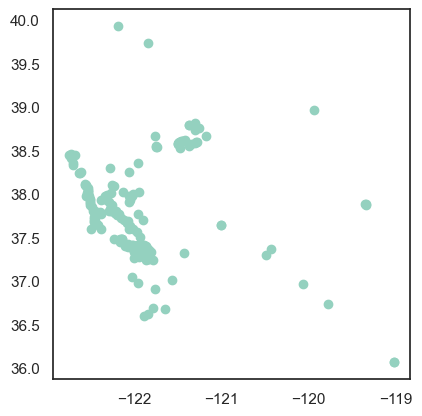

In [91]:
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [92]:
POI = bus_stations.copy()
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) & (POI["lat"] <= city_bounds["max_lat"]) &
        (POI["lon"] >= city_bounds["min_lon"]) &
        (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4), POI["lon"].round(4)))
POI_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())

for position in positions:
    name = POI.loc[POI['Coordinates'] == position, 'name'].values[0]
   
    marker = folium.Marker(location=position, popup=f'{name}')
    marker.add_to(POI_map)

display(POI_map)

### 1.8.3. - Displaying the location of stations
Displaying the location of the stations on the map will enable us to investigate closely the area of operations of the baywheels bike sharing system, providing us with valuable insights that we would not uncover by just looking at the latitude and longitude coordinates.

In [93]:
# make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()


start_station_id  start_station_lat  start_station_lon
0               219          37.809824        -122.280192
1               202          37.800754        -122.274894
2               182          37.809013        -122.268247
3               178          37.819381        -122.261928
4               195          37.812314        -122.260779

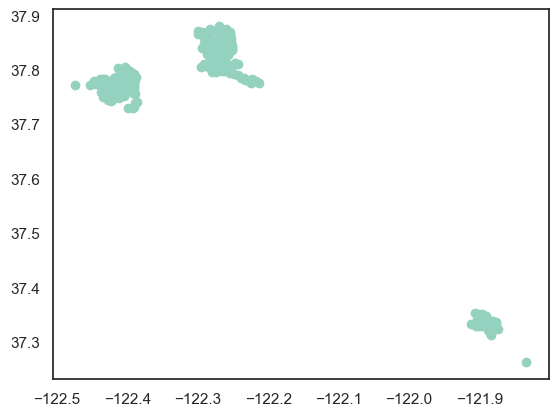

In [139]:
# display the station on a quick scatter plot
x = stations_df['start_station_lat']
y = stations_df['start_station_lon']
plt.scatter(y,x)

In [95]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

In [96]:
#try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df.head()

start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [97]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # Create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

display(stations_map)

In [98]:
# merge the new area labels in stations_df to the baywheels_df
baywheels_df = baywheels_df.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              .

In [99]:
# add the 'area_label' to baywheels_geo
baywheels_geo = baywheels_geo.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')

In [100]:
# make a seperate dataframe for each area 
san_jose_df_points = stations_df[stations_df['area_label'] == 1]

san_fran_df_points = stations_df[stations_df['area_label'] == 2]

oakland_df_points = stations_df[stations_df['area_label'] == 0]

In [101]:
san_jose_df_full = baywheels_geo[baywheels_geo['area_label'] == 1]

san_fran_df_full = baywheels_geo[baywheels_geo['area_label'] == 2]

oakland_df_full = baywheels_geo[baywheels_geo['area_label'] == 0]
oakland_df_full.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0

In [102]:
center_map = [37.737, -122.43] #center of our coordinates
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map

In [103]:
center_map = [37.300964,-121.882016] #center of our coordinates
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map

In [104]:
center_map = [37.830824, -122.2801920] #center of our coordinates
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map

In [105]:
#display list of all stations in the corresponding areas
oakland_list = oakland_df_points['start_station_id'].tolist()
san_jose_list = san_jose_df_points['start_station_id'].tolist()
san_fran_list = san_fran_df_points['start_station_id'].tolist()

print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1

# 2. - Descriptive analysis
We will further on just focus on the San Francisco area, because: 
- The San Francisco area contains 1 362 601 entries out of 1 851 949 in the whole year
- The terrain of the areas differs therefore we assume that the usage patterns could differ
- The movement of bikes between the areas was not possible in 2018, the bikes that are in SF area stay in SF area
- The weather data gives information only about San Francisco, due to the Oakland area beeing 65 kilometers from SF we assume that the weather is there different therefore we cannost apply the weather data to that area Furthermore SF is known for having a distinctive weather climate in comparison with inland california due to it being surrounded by the ocean.

In [106]:
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0

In [107]:
san_fran_df = baywheels_df[baywheels_df['area_label'] == 2]

In [108]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362601 entries, 1435 to 1851949
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   start_time                     1362601 non-null  datetime64[ns] 
 1   end_time                       1362601 non-null  datetime64[ns] 
 2   start_station_id               1362601 non-null  int64          
 3   start_station_lat              1362601 non-null  float64        
 4   start_station_lon              1362601 non-null  float64        
 5   end_station_id                 1362601 non-null  int64          
 6   end_station_lat                1362601 non-null  float64        
 7   end_station_lon                1362601 non-null  float64        
 8   bike_id                        1362601 non-null  int64          
 9   trip_duration                  1362601 non-null  timedelta64[ns]
 10  idle_time                      1362601 

We have to check if all trips in the san_fran_df have been started and ended in the San Fransisco area.

In [109]:
check_outlier('station_distance')

largest outliers in station_distance: [65.30812497359086, 19.23617238109388, 16.554505913816673, 16.368890964414334, 15.453959256313478, 15.275321274557731, 15.267686544328146, 14.817883140943849, 14.56289495133352, 14.526817788634384]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1518846929790127, 0.1526957161289509, 0.1596110645456167]


In [110]:
# make a end_stations_df to use for displaying locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])

end_stations_df.head()

end_station_id  end_station_lat  end_station_lon
1435             324        37.788300      -122.408531
1436              37        37.785000      -122.395936
1437              21        37.789625      -122.400811
1438               5        37.783899      -122.408445
1439              25        37.787522      -122.397405

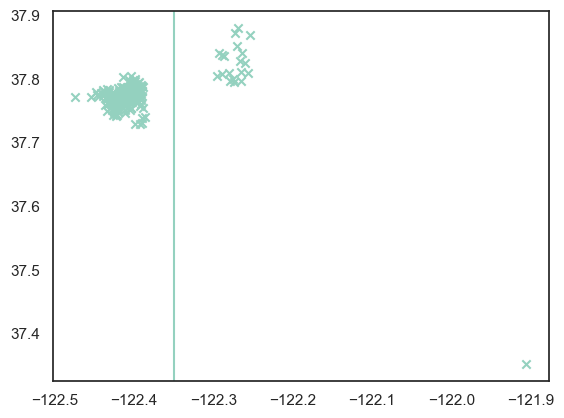

In [111]:
# plot the end_stations locations to see the outliers
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35) #we find a latitude value that clearly separates San Francisco from the other areas.
plt.show()

We can see that there there are some trips that have been started in San Francisco area but were ended in a different area such as San Jose or Oakland. 

We will drop the rows where the bikes have left the San Francisco area, because our model only predicts on the data from San Francisco area.

In [112]:
#rows that we will drop from the san_fran_df_geo
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
rows_to_drop.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
58916  2018-08-15 17:06:54 2018-08-15 22:44:21                 9          37.798572        -122.400869             151        37.836182      -122.287180      166 0 days 05:37:27 0 days 08:16:02               18.0             21.0               26.0             34.0                        Cloudy                Fair / Windy         1014.88       1013.86             15.0           35.0                  0.0                0.0                    18.0                  21.0        2           0             -3.0                         2           0         10.845829  POINT (-122.40087 37.79857)           2
121027 2018-03-29 14:25:47 2018-03-29 20:29:44                16          37.794130        -122.394430             303        37.352601      -121.905733      319 0 days 06:03:57 0 days 02:21:02               13.0             24.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1018.26       1018.26              6.0            0.0                  0.0                0.0                    13.0                  24.0        3           0            -11.0                         0           0         65.308125  POINT (-122.39443 37.79413)           2
125517 2018-06-06 21:26:16 2018-06-06 22:10:49                41          37.781270        -122.418740             156        37.838443      -122.288665      327 0 days 00:44:33 1 days 01:01:57               17.0             17.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1013.52       1013.52             30.0           30.0                  0.0                0.0                    17.0                  17.0        2           0              0.0                         3           0         13.094658  POINT (-122.41874 37.78127)           2
159106 2018-02-15 19:49:36 2018-02-15 21:13:04                93          37.770407        -122.391198             219        37.809824      -122.280192      418 0 days 01:23:28 0 days 00:33:57               14.0             16.0               34.0             34.0                          Fair                        Fair         1025.71       1024.70              0.0           11.0                  0.0                0.0                    14.0                  16.0        3           0             -2.0                         2           0         10.711788  POINT (-122.39120 37.77041)           2
294413 2018-07-14 17:41:41 2018-07-14 22:16:50                10          37.795393        -122.404770             202        37.800754      -122.274894      755 0 days 04:35:09 0 days 00:05:29               19.0             19.0               34.0             30.0                          Fair       Partly Cloudy / Windy         1017.59       1015.89             24.0           33.0                  0.0                0.0                    19.0                  19.0        5           1              0.0                         3           0         11.454000  POINT (-122.40477 37.79539)           2

In [113]:
#drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)

In [114]:
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 -364 days +15:46:04               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27     0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35     0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35     0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55     0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2

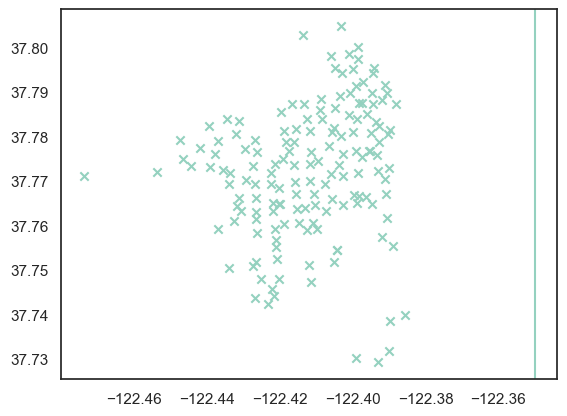

In [115]:
# check if the drop worked by ploting the end station locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)

## 2.1. - Overall System Performance


### 3.8.1. - Total Number of Trips

In [116]:
trips=len(san_fran_df.index)
trips

1362573

### 3.8.2. - Average Trips per Day and Month

In [117]:
trips_per_day=trips/365
trips_per_month=trips/12
print("Trips per day:", int(trips_per_day),"\nTrips per month:", int(trips_per_month))

Trips per day: 3733 
Trips per month: 113547


### 3.8.3. - Distance Covered by the Bikes and Emissions Saved

In [118]:
#assumption that trips are made directly from station to station so the estimatimation is undervalued
distance_total=san_fran_df["station_distance"].sum()
round(distance_total)

2264330

In [119]:
emissions=120.1
emissions_saved=distance_total*emissions
round(emissions_saved)

271946043

In [120]:
avg_kms_per_car= 13500
cars_saved=emissions_saved/avg_kms_per_car
round(cars_saved)

20144

### 3.8.4. - Rush hour average number of trips per day

In [121]:
import datetime

# Set the specific hour (in 24-hour format)
morning_hour_start = 7
morning_hour_end = 9
afternoon_hour_start = 16
afternoon_hour_end = 19

# Extract the hour from the 'start_time' column
san_fran_df['hour'] = san_fran_df['start_time'].dt.hour

# Filter rows after the specific hours and on weekdays
rush_san_fran_df = san_fran_df.loc[
    (((san_fran_df['hour'] >= morning_hour_start) & (san_fran_df['hour'] < morning_hour_end)) |
     ((san_fran_df['hour'] >= afternoon_hour_start) & (san_fran_df['hour'] < afternoon_hour_end))) &
    (san_fran_df['Is_Weekend'] == 0)
].copy()

# Print the filtered DataFrame
print(rush_san_fran_df)

                 start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 -364 days +15:46:04               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0       

In [122]:
rush_trips=len(rush_san_fran_df.index)
rush_trips

578213

In [123]:
#Assumption rush hour 7-9, 16-19
rush_trips_per_day=rush_trips/365
print("Rush trips per day:", int(rush_trips_per_day))

Rush trips per day: 1584


## 2.2. - Station level insights

### 3.9.1. - Finding most unused stations

In [124]:
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 -364 days +15:46:04               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27     0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35     0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35     0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55     0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16

#### 3.9.1.1. - Regular graph

In [125]:
# calculate the number of rentals starting & ending from each station, then merge them into one dataframe

start_station_counts = baywheels_df['start_station_id'].value_counts()
end_station_counts = baywheels_df['end_station_id'].value_counts()

"""
# checking all the stations appear:

start_sta = sorted(list(set(baywheels_df['start_station_id'].tolist())))
end_sta = sorted(list(set(baywheels_df['end_station_id'].tolist())))

if start_sta == end_sta:
    print("all stations are here")
else:
    print("problem!")

"""

station_utilization = pd.DataFrame({
    'station_id': start_station_counts.index,
    'pick-ups': start_station_counts.values,
    'returns': end_station_counts.values,
    'total': start_station_counts.values + end_station_counts.values})

# Display the station utilization dataframe


display(station_utilization)

station_id  pick-ups  returns  total
0            15     38461    50000  88461
1            67     37617    44113  81730
2            30     35092    42970  78062
3            58     34918    39222  74140
4            81     33716    35955  69671
5             6     33390    34365  67755
6            21     32131    33086  65217
7             3     31656    32786  64442
8            16     28367    28592  56959
9            22     26535    26002  52537
10            5     25007    23926  48933
11           17     21883    21094  42977
12           66     21649    20427  42076
13           90     18216    20071  38287
14           93     18150    19365  37515
15           50     17953    19213  37166
16           27     17778    18841  36619
17           44     17664    18440  36104
18          182     16435    18168  34603
19           23     15907    16746  32653
20           19     15611    15325  30936
21          243     14118    14411  28529
22          134     13651    13775  27426
23           37     13453    13615  27068
24          176     12791    13151  25942
25          126     12788    12884  25672
26           20     12678    12521  25199
27           24     12644    12471  25115
28           70     12448    12408  24856
29          324     12410    12220  24630
30           60     12148    12164  24312
31           28     12118    12095  24213
32           41     12089    12048  24137
33           43     12024    11811  23835
34           61     11727    11730  23457
35           98     11621    11500  23121
36           14     11549    11491  23040
37          284     11490    11438  22928
38          114     11408    11387  22795
39           49     11373    11296  22669
40            8     11322    11261  22583
41          239     11260    11118  22378
42           89     11079    10969  22048
43           47     11074    10900  21974
44          321     11074    10805  21879
45           36     10890    10786  21676
46           74     10795    10539  21334
47           59     10617    10415  21032
48          163     10359    10381  20740
49          323     10106    10097  20203
50            9      9989    10032  20021
51           11      9731     9967  19698
52           25      9694     9912  19606
53           88      9503     9813  19316
54          121      9472     9747  19219
55          343      9306     9591  18897
56          196      9291     9548  18839
57          109      9260     9413  18673
58           62      9209     9399  18608
59          160      9176     9266  18442
60           80      9075     9208  18283
61           75      9001     9109  18110
62           86      8883     9018  17901
63          197      8841     8874  17715
64           64      8771     8666  17437
65          245      8711     8642  17353
66           13      8677     8566  17243
67            7      8658     8462  17120
68          195      8555     8419  16974
69          223      8541     8378  16919
70           77      8375     8289  16664
71           76      8306     8201  16507
72           79      8262     8041  16303
73          200      8128     8025  16153
74           78      8104     7895  15999
75          181      8094     7805  15899
76          120      7859     7765  15624
77           10      7816     7739  15555
78          130      7814     7725  15539
79          310      7676     7702  15378
80          127      7657     7698  15355
81          241      7612     7636  15248
82          129      7582     7546  15128
83          112      7571     7440  15011
84          350      7551     7328  14879
85          104      7438     7319  14757
86          133      7387     7313  14700
87           42      7367     7248  14615
88          171      7299     6987  14286
89          296      7084     6953  14037
90           95      7063     6690  13753
91          141      6981     6612  13593
92          139      6930     6476  13406
93          285      6864     6426  13290
94           26

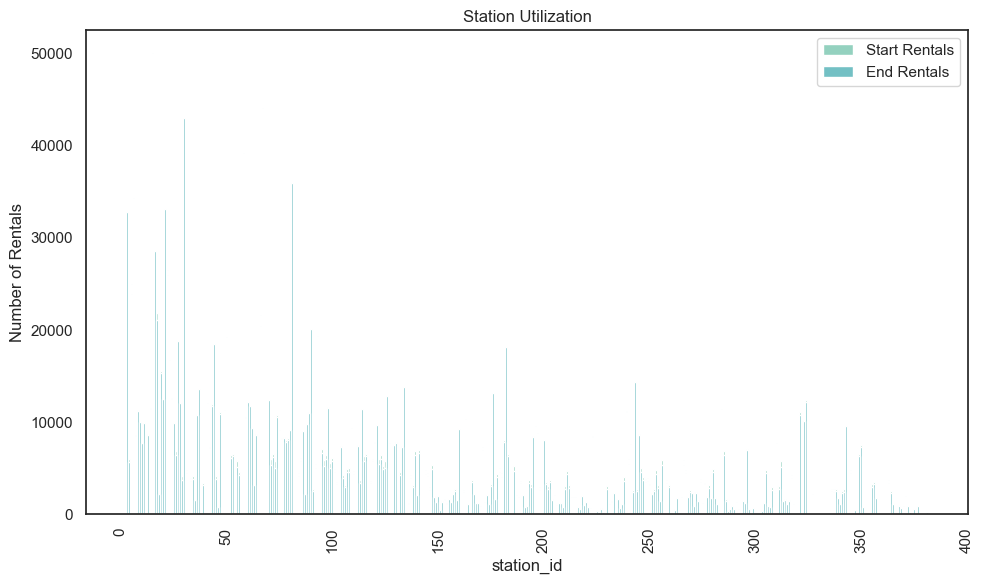

In [126]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('station_id')
plt.ylabel('Number of Rentals')
plt.title('Station Utilization')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 3.9.1.2. - Log graph

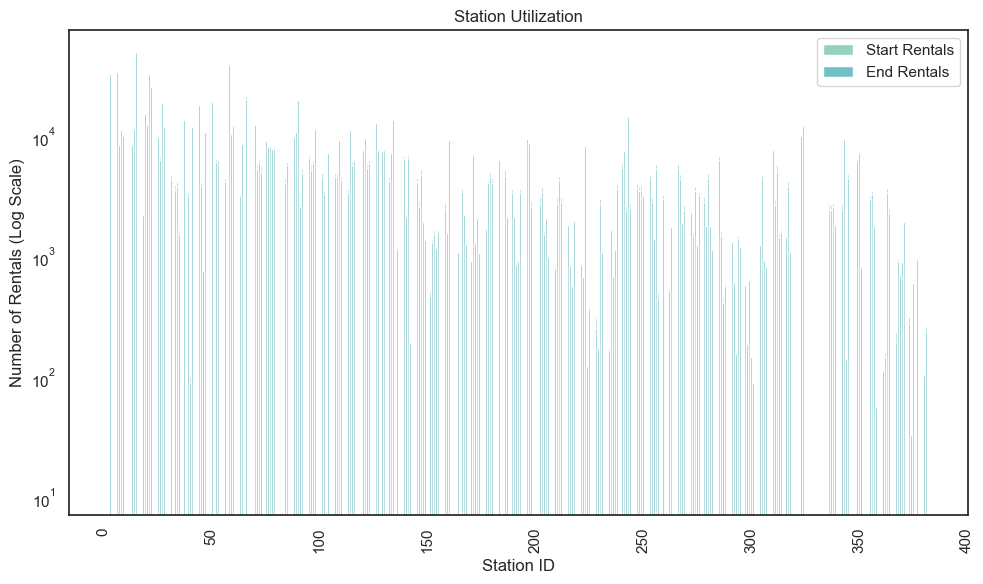

In [127]:
plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('Station ID')
plt.ylabel('Number of Rentals (Log Scale)')
plt.title('Station Utilization')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 3.9.1.3. - Seperated graphs for returns\pick ups stations

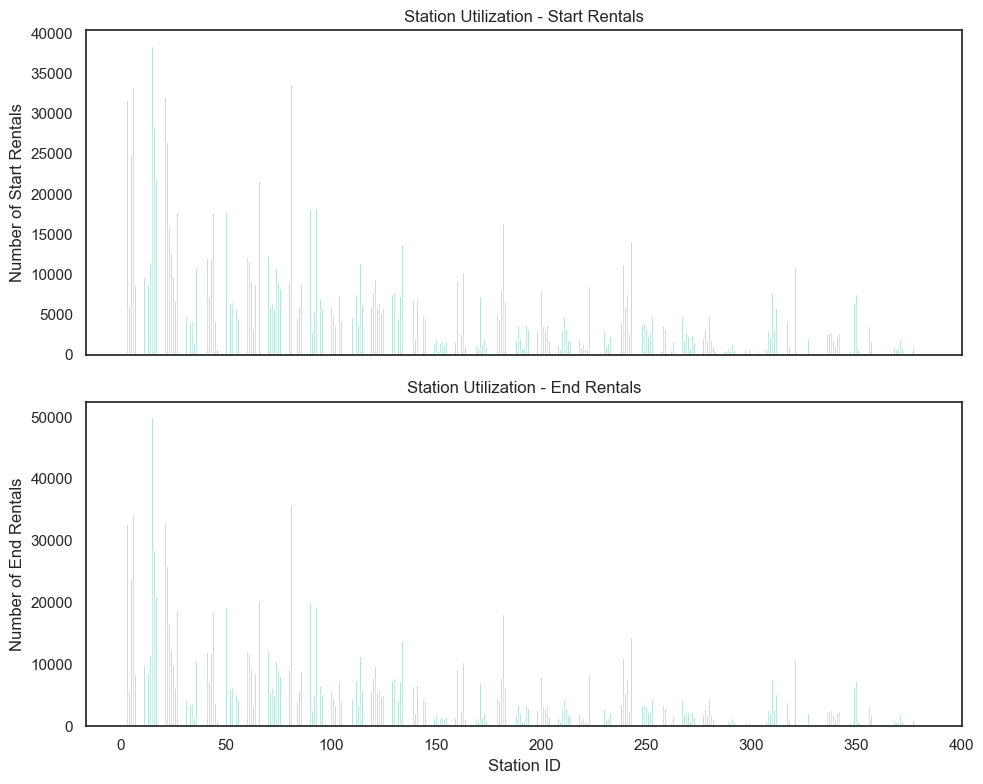

In [128]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for start rentals
ax1.bar(station_utilization['station_id'], station_utilization['pick-ups'])
ax1.set_ylabel('Number of Start Rentals')
ax1.set_title('Station Utilization - Start Rentals')

# Plot for end rentals
ax2.bar(station_utilization['station_id'], station_utilization['returns'])
ax2.set_xlabel('Station ID')
ax2.set_ylabel('Number of End Rentals')
ax2.set_title('Station Utilization - End Rentals')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

count                       mean                        std              min                     25%                     50%                     75%              max
start_station_id                                                                                                                                                                       
3                 31656  0 days 00:16:34.094642405  0 days 00:47:03.521602366  0 days 00:01:01         0 days 00:06:30         0 days 00:09:06         0 days 00:14:55  0 days 23:53:03
4                  6058  0 days 00:23:04.994882799  0 days 01:04:24.243543684  0 days 00:01:02         0 days 00:07:58  0 days 00:12:03.500000  0 days 00:19:57.750000  0 days 21:52:56
5                 25007  0 days 00:16:11.265285719  0 days 00:49:03.860885888  0 days 00:01:02         0 days 00:06:07         0 days 00:09:00         0 days 00:14:34  0 days 23:49:48
6                 33390  0 days 00:22:32.928930817  0 days 00:52:11.778571200  0 days 00:01:01         0 days 00:06:57         0 days 00:12:17         0 days 00:21:09  0 days 23:45:47
7                  8658  0 days 00:14:08.183067683  0 days 00:48:43.609654621  0 days 00:01:02         0 days 00:05:38         0 days 00:08:22         0 days 00:13:09  0 days 23:41:48
8                 11322  0 days 00:24:34.697933227  0 days 01:00:01.582457125  0 days 00:01:01         0 days 00:05:45         0 days 00:13:21         0 days 00:22:06  0 days 22:32:56
9                  9989  0 days 00:14:17.021523676  0 days 00:31:15.205497492  0 days 00:01:02         0 days 00:05:06         0 days 00:09:49         0 days 00:16:00  0 days 21:59:47
10                 7816  0 days 00:20:48.319344933  0 days 00:44:52.490998396  0 days 00:01:01  0 days 00:07:59.750000         0 days 00:14:02  0 days 00:22:30.250000  0 days 23:43:10
11                 9731  0 days 00:14:38.687493577  0 days 00:30:49.304259626  0 days 00:01:01         0 days 00:05:15         0 days 00:10:33  0 days 00:15:58.500000  0 days 22:03:17
13                 8677  0 days 00:13:53.478506396  0 days 00:37:41.317901591  0 days 00:01:02         0 days 00:05:19         0 days 00:09:33         0 days 00:15:08  0 days 20:56:02
14                11549  0 days 00:16:28.760931682  0 days 00:36:07.350437322  0 days 00:01:01         0 days 00:06:56         0 days 00:12:09         0 days 00:17:15  0 days 21:57:03
15                38461  0 days 00:21:30.263903694  0 days 00:53:53.228703578  0 days 00:01:01         0 days 00:07:12         0 days 00:11:35         0 days 00:18:31  0 days 23:43:43
16                28367  0 days 00:14:43.818486269  0 days 00:33:32.829810182  0 days 00:01:01         0 days 00:07:09         0 days 00:10:44         0 days 00:15:01  0 days 23:31:10
17                21883  0 days 00:13:52.986519215  0 days 00:36:27.356113956  0 days 00:01:03         0 days 00:05:20         0 days 00:09:38         0 days 00:14:31  0 days 23:00:50
18                 2253  0 days 00:13:18.495783399  0 days 00:36:43.608395668  0 days 00:01:01         0 days 00:05:29         0 days 00:09:38         0 days 00:14:57  0 days 19:54:45
19                15611  0 days 00:14:33.440714880  0 days 00:36:47.829021651  0 days 00:01:02         0 days 00:06:42         0 days 00:09:52         0 days 00:15:03  0 days 22:56:14
20                12678  0 days 00:16:08.924672661  0 days 00:44:15.431674187  0 days 00:01:01  0 days 00:05:44.250000         0 days 00:10:29         0 days 00:17:06  0 days 23:12:59
21                32131  0 days 00:13:18.978743269  0 days 00:36:11.192268087  0 days 00:01:01         0 days 00:06:01         0 days 00:08:57         0 days 00:13:01  0 days 22:02:08
22                26535  0 days 00:12:25.613152440  0 days 00:23:27.796241223  0 days 00:01:01         0 days 00:07:15         0 days 00:10:07  0 days 00:14:01.500000  0 days 23:35:41
23                15907  0 days 00:13:28.972464952  0 days 00:29:20.647829122  0 days 00:01:03         0 days 00:07:25         0 days 00:10:01  0 days 00:

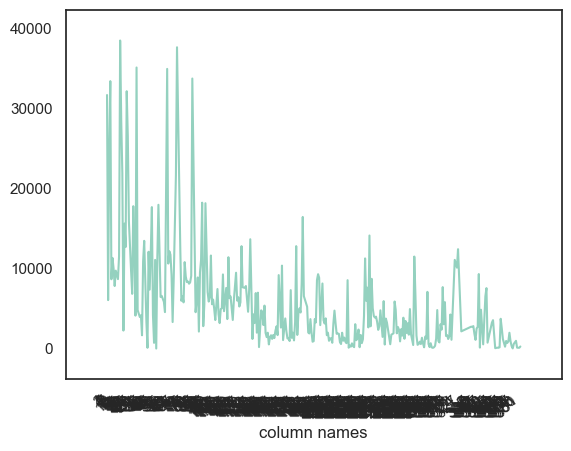

In [129]:
stations_trip_duration_start = baywheels_df.groupby('start_station_id')['trip_duration'].describe()

display(stations_trip_duration_start)

plt.plot(stations_trip_duration_start.index, stations_trip_duration_start['count'])
plt.xticks(stations_trip_duration_start.index, stations_trip_duration_start.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

#### 3.9.1.4. - Display stations color divided depending on the number of total interactions with the station

In [130]:
# calculation of median & mean:
import numpy as np

print("median:", np.median(station_utilization['total']), "\nmean:", station_utilization['total'].mean())

# Create a map object
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding usage data for the current station_id
    row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not row.empty:
        usage_value = row.iloc[0]['total']

        # Determine the marker color based on the usage value
        if usage_value < 365:
            color = 'red'
        elif usage_value <= np.median(station_utilization['total']): #can also use mean instade: (station_utilization['total'].mean())
            color = 'orange'
        elif usage_value < 20000:
            color = 'blue'
        else:
            color = 'green'

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id} \nInteractions: {usage_value}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map

median: 6836.0 
mean: 11190.030211480362


#### 3.9.1.5. - Display stations color divided depending on the duration of the trips

In [131]:
from datetime import timedelta

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_duration_start.index:
        trip_stats = stations_trip_duration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Convert timedelta values to minutes
        mean_duration_minutes = mean_duration.total_seconds() / 60
        max_duration_minutes = max_duration.total_seconds() / 60
        min_duration_minutes = min_duration.total_seconds() / 60

        # Determine the marker color based on the trip duration statistics
        if mean_duration < timedelta(minutes=10):
            color = 'green'
        elif mean_duration <= timedelta(minutes=20):
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration_minutes:.2f} minutes\nMax Duration: {max_duration_minutes:.2f} minutes\nMin Duration: {min_duration_minutes:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map

## 2.3. - Preparation for predictive task
We will examine more deeply the trends of idle_time in connection with various features such as distances to significant POIs, time of day, seasonal trends etc.

In [132]:
# importing all necessary libraries


### 2.3.1. - Update the column idle_time
For the purpose of prediction of idle_time it makes more sense to include the idle_time of a bike in the column where the bike trip preceding the idle_time has been recorded. 

This will make it possible to directly examine the features such as weather at time of drop off, end_time or end_station_id.

In [133]:
san_fran_df['idle_time']


1435      -364 days +15:46:04
1436          0 days 01:32:38
1437          0 days 19:49:39
1438          0 days 07:33:35
1439          0 days 03:10:19
                  ...        
1851945       0 days 01:16:38
1851946       0 days 02:15:45
1851947       0 days 01:50:53
1851948       0 days 01:43:51
1851949       0 days 01:19:27
Name: idle_time, Length: 1362573, dtype: timedelta64[ns]

In [134]:
#sort the dataframe by bike id and start time
san_fran_df.sort_values(['bike_id', 'start_time'], inplace=True)
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 -364 days +15:46:04               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27     0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35     0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35     0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55     0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...                 ...                ...              ...                ...              ...                           ...         

We have a look at the first bike:

In [135]:
bike17 = san_fran_df[san_fran_df['bike_id']==17]
bike17

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 -364 days +15:46:04               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27     0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35     0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                 0.00               0.00                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35     0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                 0.00               0.00                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55     0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                 0.00               0.00                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
1440 2018-01-03 16:38:29 2018-01-03 16:46:13                25          37.787522        -122.397405              30        37.776598      -122.395282       17 0 days 00:07:44     0 days 00:12:10               12.0             12.0               26.0             26.0                        Cloudy                      Cloud

This shows us that the idle_time is in the row of the next rental, we now want to shift the row to the one were the trip has ended.

We can do this because the dataframe is grouped by bike id and sorted chronologicaly in those groups.

As a result each last rental of the year for every bike_id will have an NaN value.

In [136]:
#perform the shift
san_fran_df['idle_time'] =  san_fran_df['idle_time'].shift(-1)

In [137]:
#check that the shift has worked
bike17 = san_fran_df[san_fran_df['bike_id']==17]
bike17

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration           idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52     0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27     0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35     0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                 0.00               0.00                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35     0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                 0.00               0.00                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55     0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                 0.00               0.00                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
1440 2018-01-03 16:38:29 2018-01-03 16:46:13                25          37.787522        -122.397405              30        37.776598      -122.395282       17 0 days 00:07:44     0 days 02:25:33               12.0             12.0               26.0             26.0                        Cloudy                      Cloud

In [138]:
#look at the the whole dataframe
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...         

### 2.3.2 - POI features
The process that brought us to choose the following points of interest has been driven by the visual analysis made on the usage volume of Bike Stations located in a radius of 400m from our POI.
#### 2.3.2.1 - King street central station
King street central station is one of our first potential POIs that we could use for predicting the idle_time.

Located just south of Market Street, this station represents one of the most relevant points for bikes drop off and pick up, displaying all the point of interest in this area we found the Tahoe Convoy bus station that can be considered as our POI for summing up the bike sharing volume of this area of the city.
Supporting this POI decision is the presence of three of the most used Bike Stations in all of San Francisco, station 81 and station 30 and station 67.


We use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station:

In [140]:
central_station = pois_df[pois_df['name'] == 'Tahoe Convoy']
central_station

version   timestamp  changeset          id        lat        lon          name opening_hours      amenity  atm bank bicycle_parking bicycle_rental  bar building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office parking police school social_facility source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes shop  ski supermarket trade video water wholesale wine attraction camp_site guest_house information museum tourism viewpoint  zoo                     geometry osm_type  bbq restaurant social_centre caravan deli golf laundry swimming_pool trailer tyres
79303        2  1617944594        0.0  8418786287  37.775352 -122.39713  Tahoe Convoy           NaN  bus_station  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN     NaN    NaN    NaN             NaN    NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN  NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN         NaN         NaN    NaN     NaN       NaN  NaN  POINT (-122.39713 37.77535)     node  NaN        NaN           NaN     NaN  NaN  NaN     NaN           NaN     NaN   NaN

We define a new function that will calculate the distance of the a station in kilometers from the chosen POI. 

In [141]:
def calculate_distance(row, lat, lon, central_station):
    location = (row[lat], row[lon])
    target_location = (central_station['lat'], central_station['lon'])
    return geodesic(location, target_location).kilometers

central_station = {'lat': 37.775352, 'lon': -122.39713}
#we will not let this run due to time constraints

#san_fran_df['end_station_central_station_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', central_station), axis=1)

print()

In [142]:
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...         

We are interested in the distance of the end_station from a chosen POI. The assumptions is that the idle_time will be influenced by/dependent on the how far the station is located from a point of interest.

#### 2.3.2.2. - Twitter HQ
for comparison we will also choose more random point from the map where there also was a lot of rentals (only at one station), such as a place in the vicinity of the Twitter HQ.

In [143]:
twitter_HQ = {"lat": 37.7767414, "lon": -122.4165504}
#we will not let this run due to time constraints
"""
san_fran_df['end_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', twitter_HQ), axis=1)
"""

"\nsan_fran_df['end_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', twitter_HQ), axis=1)\n"

In [144]:
#check if a new column has been added
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16

#### 2.3.2.3. San Francisco Ferry Building
The San Francisco Ferry Building is the second significatn POI we have discovered with our visual analysis.

Located in the dock area of San Francisco that connects the city with the other side of the bay is a relevant spot for people that are used to prefer bikes to cars for moving through the whole bay area.
The area of the dock is also one of the few hoods in the city without hills which makes it attractive for bike rides, validating this observation is the fact that the bike station with the highest interaction in all the bay is located in this area with more than 85 thousand interactions during the whole year.


In [145]:
ferry_building = pois_df[pois_df['name'] == 'San Francisco Ferry Building']
ferry_building

version   timestamp  changeset         id  lat  lon                          name                                      opening_hours         amenity  atm bank bicycle_parking bicycle_rental  bar  building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office parking police school social_facility         source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes  shop  ski supermarket trade video water wholesale wine attraction camp_site guest_house information museum     tourism viewpoint  zoo     geometry osm_type  bbq restaurant social_centre caravan deli golf laundry swimming_pool trailer tyres
154410       12  1681335904        NaN  558731934  NaN  NaN  San Francisco Ferry Building  Mo-Fr 07:00-22:00; Sa 07:00-22:00; Su 07:00-22:00  ferry_terminal  NaN  NaN             NaN            NaN  NaN  terminal             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN     NaN    NaN    NaN             NaN  USGS Geonames        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN  mall  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN         NaN         NaN    NaN  attraction       NaN  NaN  POINT EMPTY      way  NaN        NaN           NaN     NaN  NaN  NaN     NaN           NaN     NaN   NaN

Because the San Francisco Ferry Building is mission coordinates we will use the coordinates of station_id 16 that is located directly infront of the building

In [146]:
station_16 = san_fran_df[san_fran_df['start_station_id'] == 16.0][['start_station_lat','start_station_lon']]
station_16

start_station_lat  start_station_lon
1450              37.79413         -122.39443
1503              37.79413         -122.39443
1670              37.79413         -122.39443
1717              37.79413         -122.39443
1725              37.79413         -122.39443
...                    ...                ...
1851609           37.79413         -122.39443
1851681           37.79413         -122.39443
1851763           37.79413         -122.39443
1851820           37.79413         -122.39443
1851880           37.79413         -122.39443

[28366 rows x 2 columns]

In [147]:
ferry_building = {'lat': 37.79413, 'lon': -122.39443}
#we will not let this run due to time constraints
"""
san_fran_df['end_station_ferry_building_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', ferry_building), axis=1)
"""
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16

We export the dataframe with the calculated distances into a csv file in order to support faster loading of the notebook. The calculation of distances otherwise takes a long time.  

In [148]:
#san_fran_df.to_csv('san_fran_with_distance.csv.gz', compression='gzip')

In [149]:
#reading a csv file that already has all the distances to POIs 
san_fran_df = pd.read_csv('san_fran_with_distance.csv', low_memory=False, index_col=0) 
#make sure that you have downloaded the latest csv file form the google drive!
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362573 entries, 1160 to 1362480
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   start_time                        1362573 non-null  object 
 1   end_time                          1362573 non-null  object 
 2   start_station_id                  1362573 non-null  int64  
 3   start_station_lat                 1362573 non-null  float64
 4   start_station_lon                 1362573 non-null  float64
 5   end_station_id                    1362573 non-null  int64  
 6   end_station_lat                   1362573 non-null  float64
 7   end_station_lon                   1362573 non-null  float64
 8   bike_id                           1362573 non-null  int64  
 9   trip_duration                     1362573 non-null  object 
 10  idle_time                         1359347 non-null  object 
 11  station_idle_time                 

In [150]:
#convert the columns containing time values to their correct datatype
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'])
san_fran_df['end_time'] = pd.to_datetime(san_fran_df['end_time']) 
                                                
san_fran_df['trip_duration'] = pd.to_timedelta(san_fran_df['trip_duration'])
san_fran_df['idle_time'] = pd.to_timedelta(san_fran_df['idle_time'])
san_fran_df['station_idle_time'] = pd.to_timedelta(san_fran_df['station_idle_time'])
#rows that we will drop from the san_fran_df_geo
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
#drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)


We will drop the start_ columns derived from the weather dataset as the majority of the trip duration is very short and having two columns for each weather information is unnecessary.

In [152]:
san_fran_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'station_idle_time', 'end_temperature', 'end_cloud_cover', 'end_cloud_cover_description', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'area_label', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist'], dtype='object')

In [41]:
#columns_to_drop = ['start_felt_temperature', 'start_precipitation', 'start_windspeed', 'start_pressure', 'start_cloud_cover_description', 'start_cloud_cover', 'start_temperature']
#san_fran_df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [153]:
san_fran_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'station_idle_time', 'end_temperature', 'end_cloud_cover', 'end_cloud_cover_description', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'area_label', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist'], dtype='object')

### 2.3.3 - Descriptive analysis 
Examining the relations between various features and idle time.

In [154]:
# we create a function that will show the mean idle time for the values in a selected column from the san_fran_df
def calculate_mean_in(column):
    unique_values = np.sort(san_fran_df[column].unique())
    for i in unique_values:
        print("The average idle time when {column} is {i}:  {mean}".format(column=column, i=i, mean=san_fran_df[san_fran_df[column] == i]['idle_time'].mean()))  

#### 2.3.3.1. - hour_of_day

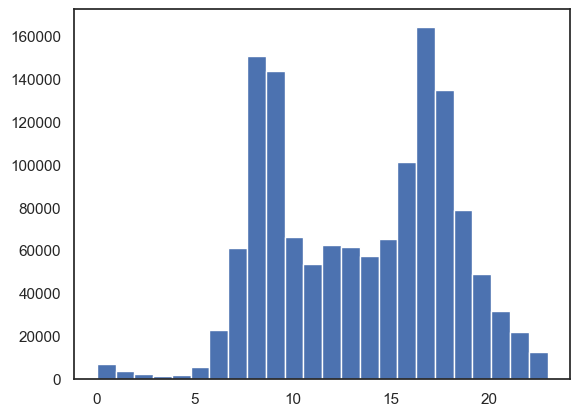

The average idle time when hour_of_day is 0:  0 days 14:05:03.961995938
The average idle time when hour_of_day is 1:  0 days 15:16:26.529443838
The average idle time when hour_of_day is 2:  0 days 13:58:53.527766518
The average idle time when hour_of_day is 3:  0 days 13:03:33.649289099
The average idle time when hour_of_day is 4:  0 days 08:06:10.769767441
The average idle time when hour_of_day is 5:  0 days 07:43:55.307834101
The average idle time when hour_of_day is 6:  0 days 05:38:48.127124553
The average idle time when hour_of_day is 7:  0 days 05:34:04.023029330
The average idle time when hour_of_day is 8:  0 days 06:52:56.237768593
The average idle time when hour_of_day is 9:  0 days 08:16:13.940737385
The average idle time when hour_of_day is 10:  0 days 08:59:19.017484787
The average idle time when hour_of_day is 11:  0 days 08:27:02.122036366
The average idle time when hour_of_day is 12:  0 days 08:26:18.209823434
The average idle time when hour_of_day is 13:  0 days 08:42:1

In [60]:
x=san_fran_df['hour_of_day']
plt.hist(x, bins=24)
plt.show()
calculate_mean_in('hour_of_day')

This histogram shows that most of the rentals are done in the morning and in the afternoon, directly corelated with transport to and from work.

The mean idle times at different times of day differ strongly and some trends have emerged: 

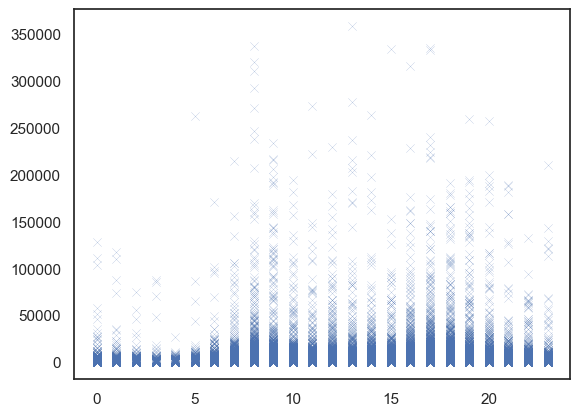

In [61]:
plt.scatter(san_fran_df['hour_of_day'], san_fran_df['idle_time'].dt.total_seconds()/60.0, marker='x', linewidths=0.1)

In [131]:
#san_fran_df.to_csv('data_for_prediction.csv.gz', index=False, compression='gzip')